In [2]:
from music21 import *
from utilities.constants import *
import pandas as pd
import os
from utilities.corpus_search import *
from utilities.model_matching_computation import *
import numpy as np

Some scores don't have the corrisponding MusicXML file. We delete those 

In [3]:
# PREPARE DATASET FOR TRAINING 
all_tracks_id = []
for track in get_all_id_tracks():
    path = DF_PATH_TRACKS + track + '/' + track + '.xml'
    if os.path.exists(path):
            all_tracks_id.append(track)
df = pd.DataFrame({
    'track_id': all_tracks_id,
    'nawba': get_id_label('nawba')
    })
for nawba in NAWBA_LIST_TRAIN:
      print(f"Nawba {nawba}: {len(get_id_track_by_nawba(nawba))}")

Nawba 1: 22
Nawba 2: 13
Nawba 3: 7
Nawba 4: 14
Nawba 5: 10
Nawba 6: 7
Nawba 7: 12
Nawba 10: 17
Nawba 11: 16
Nawba 12: 7
Nawba 13: 11


In [4]:
def skf_model_matching_test(label, df, random_state, k, test_dim, std):
    # PREPARE DATASET FOR TRAINING
    X = df.filter(['track_id', label])
    y = df.filter([label])

    overall_acc= []
    actual = []
    predicted = []
    y_model_list = []
    # Stratified K-Fold Cross-Validation LOOP
    for fold in range(k):        
        test_indices = []
        train_indices = []

        for label_t in y[label].unique():
            label_indices = y[y[label] == label_t].index.to_list()
        
            # SET REPRODUCIBLE SEED FOR SHUFFLE
            np.random.seed(fold * random_state)  
            np.random.shuffle(label_indices)

            test_indices.extend(label_indices[:test_dim])  
            train_indices.extend(label_indices[test_dim:])  
            

        X_train, X_test = X.loc[train_indices], X.loc[test_indices]
        _, y_test = y.loc[train_indices], y.loc[test_indices]
        
        # CREATE TEMPLATES FOR EACH LABEL
        y_model_list = []
        for label_t2 in LABEL_LIST_TRAIN[label]:
            _, y_temp = compute_avg_folded_hist_scores(X_train.loc[X_train[label] == label_t2, 'track_id'].tolist())        
            _, y_model = convert_folded_scores_in_models([y_temp], std)
            y_model_list.append(y_model[0])

        # COMPUTE MODEL OF TEST SAMPLES
        curr_acc = []
        for i in range(len(X_test)):
            _, y_temp = compute_avg_folded_hist_scores([X_test.iloc[i]['track_id']])
            _, y_model_list_test = convert_folded_scores_in_models([y_temp], std)

            # RUN ACCURACY TEST
            label_score = []
            for l, label_t3 in enumerate(LABEL_LIST_TRAIN[label]):
                label_score.append((get_distance(y_model_list_test[0], y_model_list[l], 'L2'), label_t3))
            
            curr_acc.append(y_test.iloc[i][label] == min(label_score)[1])
            actual.append(y_test.iloc[i][label])
            predicted.append(min(label_score)[1])
        overall_acc.append(sum(curr_acc) / len(curr_acc))
        
    return y_model_list, actual, predicted, overall_acc  


<music21.chord.Chord B4 A#5 B5> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.chord.Chord B4 A#5 B5> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.chord.Chord B4 A#5 B5> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.chord.Chord B4 A#5 B5> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.chord.Chord B4 A#5 B5> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.chord.Chord B4 A#5 B5> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded


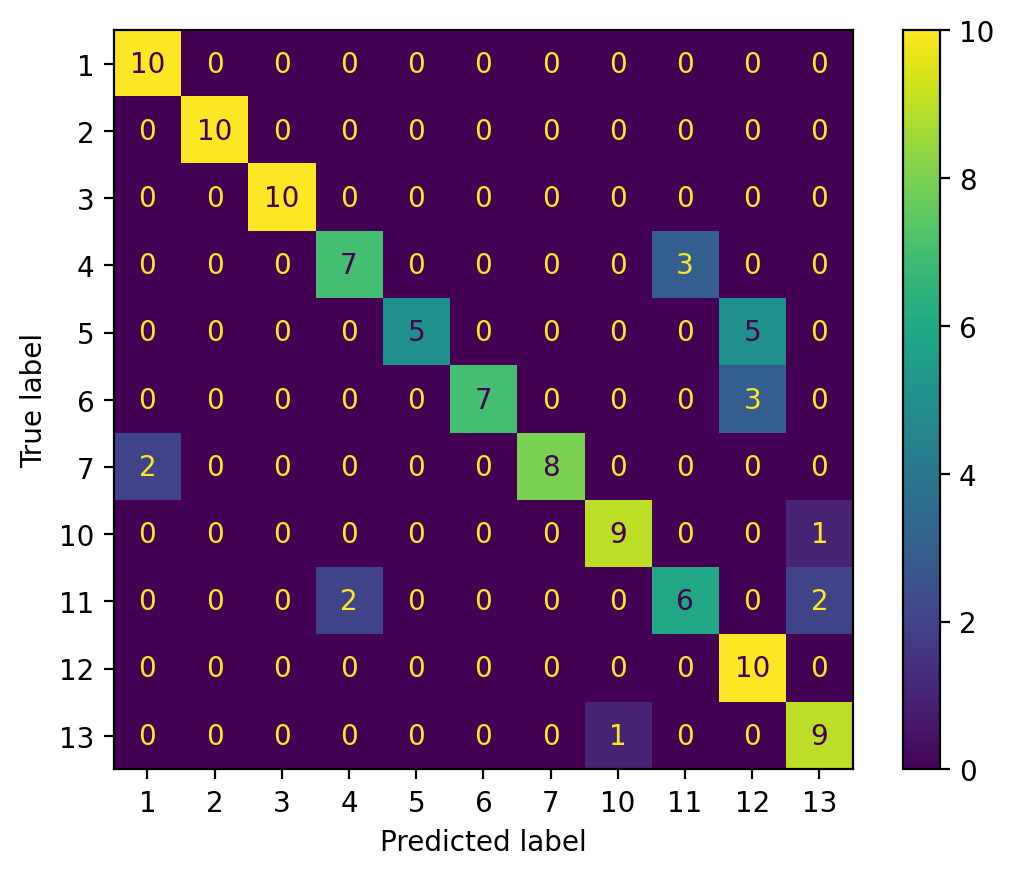

In [ ]:

df = df.dropna()
df = df[df['nawba'].isin(NAWBA_LIST_TRAIN)]
#df = df[df['track_id'] != '0386e377-7212-43e5-89b6-7f4c42d0ae74']
#df.info()
y_models, y_test, y_pred, overall_acc = skf_model_matching_test('nawba', df, random_state= 51, k= 10,test_dim=1, std=30)

print_performance(y_test, y_pred, overall_acc)

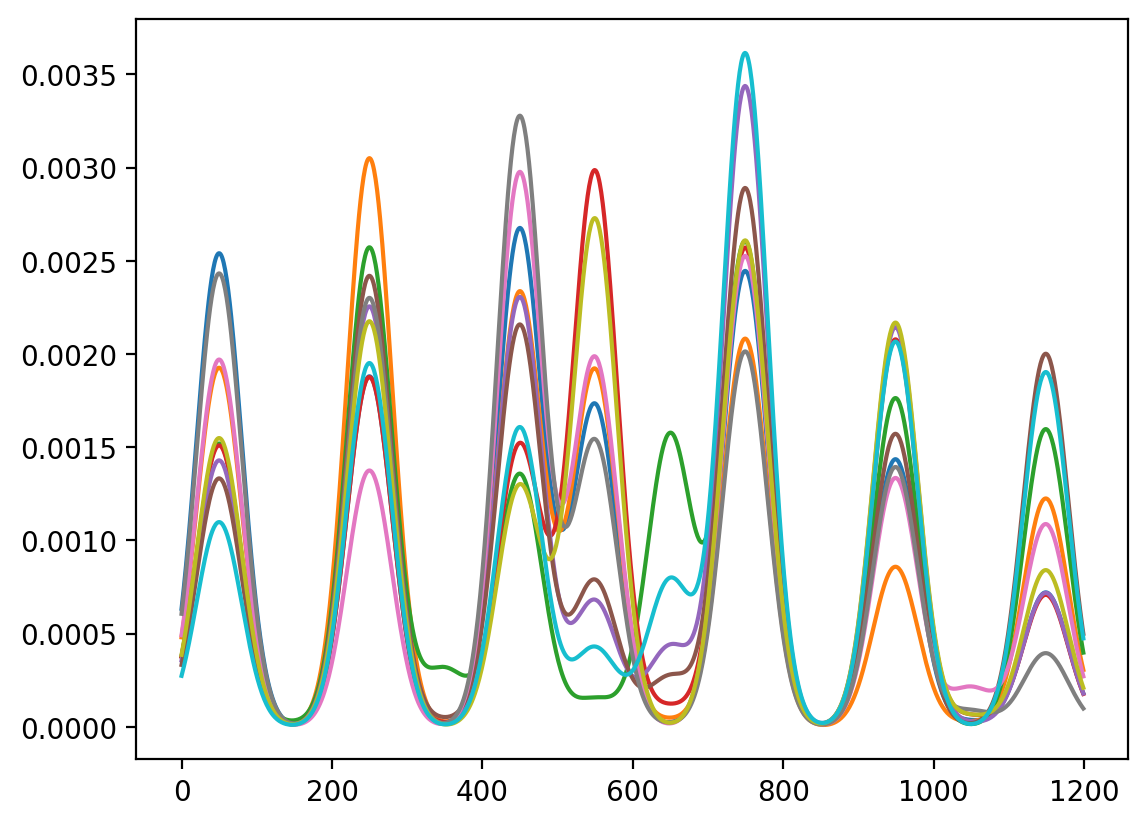

In [8]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.plot(y_models[i])

<music21.chord.Chord B4 A#5 B5> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.chord.Chord B4 A#5 B5> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.chord.Chord B4 A#5 B5> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.chord.Chord B4 A#5 B5> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.chord.Chord B4 A#5 B5> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded
<music21.chord.Chord B4 A#5 B5> discarded
<music21.note.Note F##> discarded
<music21.note.Note F##> discarded


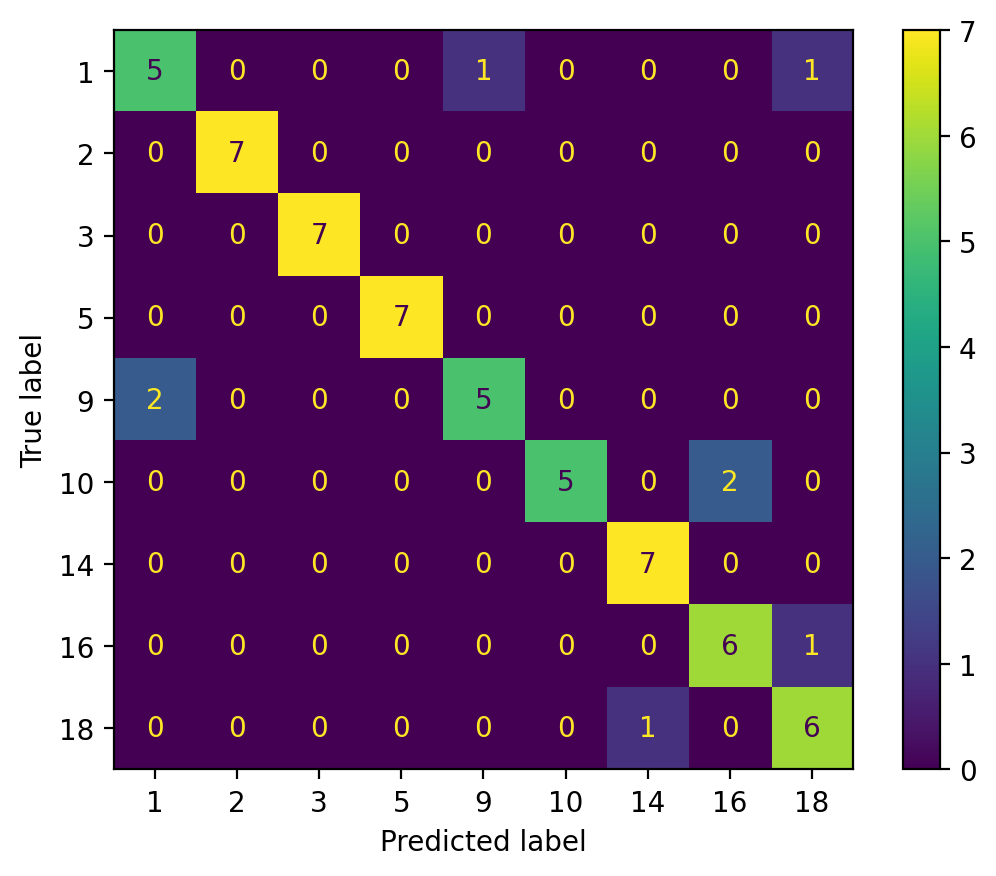

In [3]:
# PREPARE DATASET FOR TRAINING 
all_tracks_id = []
for track in get_all_id_tracks():
    path = DF_PATH_TRACKS + track + '/' + track + '.xml'
    if os.path.exists(path):
            all_tracks_id.append(track)
df = pd.DataFrame({
    'track_id': all_tracks_id,
    'tab': get_id_label('tab')
    })

df = df[df['tab'].isin(TAB_LIST_TRAIN)]
#df.info()

y_test, y_pred, overall_acc = skf_model_matching('tab', df, random_state= 51, k= 7, test_dim=1, std=30)
print_performance(y_test, y_pred, overall_acc)